In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg19 import VGG19
import cv2

Using TensorFlow backend.


In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

image=cv2.imread('/content/gdrive/My Drive/Colab Notebooks/image.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(1000,600))
image=image[20:550,70:950]
image=cv2.resize(image,(224,224))
style=cv2.imread('/content/gdrive/My Drive/Colab Notebooks/style.png')
style=cv2.cvtColor(style,cv2.COLOR_BGR2RGB)
style=cv2.resize(style,(1000,600))
style=style[20:550,70:950]
style=cv2.resize(style,(224,224))


(224, 224, 3)


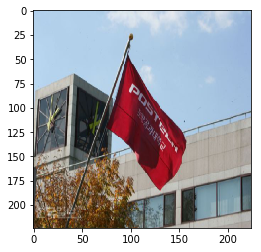

In [4]:

plt.imshow(image)
print(image.shape)


(224, 224, 3)


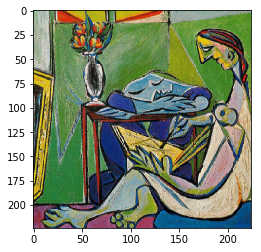

In [5]:

plt.imshow(style)
print(style.shape)

In [6]:
model=VGG19(weights='imagenet')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [7]:
vgg19_weight=model.get_weights()
for i in range(len(vgg19_weight)):
  print(np.array(vgg19_weight[i]).shape)
print(np.array(vgg19_weight[30]).shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)
(3, 3, 512, 512)


In [0]:
weights={
    'conv1_1':tf.constant(vgg19_weight[0]),
    'conv1_2':tf.constant(vgg19_weight[2]),
    
    'conv2_1':tf.constant(vgg19_weight[4]),
    'conv2_2':tf.constant(vgg19_weight[6]),
    
    
    'conv3_1':tf.constant(vgg19_weight[8]),
    'conv3_2':tf.constant(vgg19_weight[10]),
    'conv3_3':tf.constant(vgg19_weight[12]),
    'conv3_4':tf.constant(vgg19_weight[14]),
    
    'conv4_1':tf.constant(vgg19_weight[16]),
    'conv4_2':tf.constant(vgg19_weight[18]),
    'conv4_3':tf.constant(vgg19_weight[20]),
    'conv4_4':tf.constant(vgg19_weight[22]),

    'conv5_1':tf.constant(vgg19_weight[24]),
    'conv5_2':tf.constant(vgg19_weight[26]),
    'conv5_3':tf.constant(vgg19_weight[28]),
    'conv5_4':tf.constant(vgg19_weight[30]),
    
    'fc1':tf.constant(vgg19_weight[32]),
    'fc2':tf.constant(vgg19_weight[34]),
    'out':tf.constant(vgg19_weight[36]),

}

biases={
    'conv1_1':tf.constant(vgg19_weight[1]),
    'conv1_2':tf.constant(vgg19_weight[3]),
    
    'conv2_1':tf.constant(vgg19_weight[5]),
    'conv2_2':tf.constant(vgg19_weight[7]),
    
    
    'conv3_1':tf.constant(vgg19_weight[9]),
    'conv3_2':tf.constant(vgg19_weight[11]),
    'conv3_3':tf.constant(vgg19_weight[13]),
    'conv3_4':tf.constant(vgg19_weight[15]),
    
    'conv4_1':tf.constant(vgg19_weight[17]),
    'conv4_2':tf.constant(vgg19_weight[19]),
    'conv4_3':tf.constant(vgg19_weight[21]),
    'conv4_4':tf.constant(vgg19_weight[23]),

    'conv5_1':tf.constant(vgg19_weight[25]),
    'conv5_2':tf.constant(vgg19_weight[27]),
    'conv5_3':tf.constant(vgg19_weight[29]),
    'conv5_4':tf.constant(vgg19_weight[31]),
    
    'fc1':tf.constant(vgg19_weight[33]),
    'fc2':tf.constant(vgg19_weight[35]),
    'out':tf.constant(vgg19_weight[37]),
}



In [0]:
def build_net(x,weights,biases):
  conv1_1=tf.nn.conv2d(input=x,filter=weights['conv1_1'],strides=[1,1,1,1],padding='SAME',)+biases['conv1_1']
  conv1_2=tf.nn.conv2d(input=conv1_1,filter=weights['conv1_2'],strides=[1,1,1,1],padding='SAME')+biases['conv1_2']
  maxp1=tf.layers.max_pooling2d(inputs=conv1_2,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv2_1=tf.nn.conv2d(input=maxp1,filter=weights['conv2_1'],strides=[1,1,1,1],padding='SAME',)+biases['conv2_1']
  conv2_2=tf.nn.conv2d(input=conv2_1,filter=weights['conv2_2'],strides=[1,1,1,1],padding='SAME')+biases['conv2_2']
  maxp2=tf.layers.max_pooling2d(inputs=conv2_2,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv3_1=tf.nn.conv2d(input=maxp2,filter=weights['conv3_1'],strides=[1,1,1,1],padding='SAME',)+biases['conv3_1']
  conv3_2=tf.nn.conv2d(input=conv3_1,filter=weights['conv3_2'],strides=[1,1,1,1],padding='SAME')+biases['conv3_2']
  conv3_3=tf.nn.conv2d(input=conv3_2,filter=weights['conv3_3'],strides=[1,1,1,1],padding='SAME',)+biases['conv3_3']
  conv3_4=tf.nn.conv2d(input=conv3_3,filter=weights['conv3_4'],strides=[1,1,1,1],padding='SAME')+biases['conv3_4']
  maxp3=tf.layers.max_pooling2d(inputs=conv3_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv4_1=tf.nn.conv2d(input=maxp3,filter=weights['conv4_1'],strides=[1,1,1,1],padding='SAME',)+biases['conv4_1']
  conv4_2=tf.nn.conv2d(input=conv4_1,filter=weights['conv4_2'],strides=[1,1,1,1],padding='SAME')+biases['conv4_2']
  conv4_3=tf.nn.conv2d(input=conv4_2,filter=weights['conv4_3'],strides=[1,1,1,1],padding='SAME',)+biases['conv4_3']
  conv4_4=tf.nn.conv2d(input=conv4_3,filter=weights['conv4_4'],strides=[1,1,1,1],padding='SAME')+biases['conv4_4']
  maxp4=tf.layers.max_pooling2d(inputs=conv4_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv5_1=tf.nn.conv2d(input=maxp4,filter=weights['conv5_1'],strides=[1,1,1,1],padding='SAME',)+biases['conv5_1']
  conv5_2=tf.nn.conv2d(input=conv5_1,filter=weights['conv5_2'],strides=[1,1,1,1],padding='SAME')+biases['conv5_2']
  conv5_3=tf.nn.conv2d(input=conv5_2,filter=weights['conv5_3'],strides=[1,1,1,1],padding='SAME',)+biases['conv5_3']
  conv5_4=tf.nn.conv2d(input=conv5_3,filter=weights['conv5_4'],strides=[1,1,1,1],padding='SAME')+biases['conv5_4']
  maxp5=tf.layers.max_pooling2d(inputs=conv5_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  flatten=tf.reshape(maxp5,(-1,25088))
  fc1=tf.matmul(flatten,weights['fc1'])+biases['fc1']
  fc1=tf.nn.relu(fc1)
  fc2=tf.matmul(fc1,weights['fc2'])+biases['fc2']
  fc2=tf.nn.relu(fc2)
  out=tf.matmul(fc2,weights['out'])+biases['out']
  
  return conv1_1,conv2_1,conv3_1,conv4_1,conv5_1,conv4_2
  
  
  

In [0]:
def build_model(x,weights,biases):
  conv1_1=tf.layers.conv2d(inputs=x,filters=64,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv1_2=tf.layers.conv2d(inputs=conv1_1,filters=64,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  maxp1=tf.layers.max_pooling2d(inputs=conv1_2,pool_size=[2,2],strides=(2,2),padding='VALID')

  conv2_1=tf.layers.conv2d(inputs=maxp1,filters=128,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv2_2=tf.layers.conv2d(inputs=conv2_1,filters=128,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  maxp2=tf.layers.max_pooling2d(inputs=conv2_2,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv3_1=tf.layers.conv2d(inputs=maxp2,filters=256,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv3_2=tf.layers.conv2d(inputs=conv3_1,filters=256,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv3_3=tf.layers.conv2d(inputs=conv3_2,filters=256,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv3_4=tf.layers.conv2d(inputs=conv3_3,filters=256,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  maxp3=tf.layers.max_pooling2d(inputs=conv3_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv4_1=tf.layers.conv2d(inputs=maxp3,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv4_2=tf.layers.conv2d(inputs=conv4_1,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv4_3=tf.layers.conv2d(inputs=conv4_2,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv4_4=tf.layers.conv2d(inputs=conv4_3,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  maxp4=tf.layers.max_pooling2d(inputs=conv4_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  conv5_1=tf.layers.conv2d(inputs=maxp4,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv5_2=tf.layers.conv2d(inputs=conv5_1,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv5_3=tf.layers.conv2d(inputs=conv5_2,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  conv5_4=tf.layers.conv2d(inputs=conv5_3,filters=512,kernel_size=[3,3],padding='SAME',activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  maxp5=tf.layers.max_pooling2d(inputs=conv5_4,pool_size=[2,2],strides=(2,2),padding='VALID')
  
  flatten=tf.reshape(maxp5,(-1,25088))
  hidden1=tf.layers.dense(inputs=flatten,units=4096,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  hidden2=tf.layers.dense(inputs=hidden1,units=4096,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)
  output=tf.layers.dense(inputs=hidden2,units=1000,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal(),reuse=reuse)

  
  return conv1_1,conv2_1,conv3_1,conv4_1,conv5_1,conv4_2

In [0]:
input_gen=tf.Variable(tf.random_uniform([1,224,224,3],maxval=255))
x=tf.placeholder(tf.float32,[1,224,224,3])
y=tf.placeholder(tf.float32,[1,224,224,3])

In [0]:
def get_loss(predict,target):
  loss=tf.reduce_mean(tf.square(predict-target))
  return loss

In [0]:
def gram_matrix(matrix):
  matrix=tf.reshape(matrix,(-1,matrix.get_shape()[-1]))
  gram=tf.matmul(tf.transpose(matrix),matrix)
  #print(tf.float32(matrix.get_shape()[0]*matrix.get_shape()[-1]))
  return gram/(tf.cast(matrix.get_shape()[0]*matrix.get_shape()[-1],dtype=tf.float32))

In [0]:
def style_loss(g_layers,ref_layers):
  loss=0
  for g_layer,ref_layer in zip(g_layers,ref_layers):
    #print(g_layer)
    #print(get_loss(gram_matrix(g_layer),gram_matrix(ref_layer)))
    loss+=get_loss(gram_matrix(g_layer),gram_matrix(ref_layer))
  return loss

In [0]:

_,_,_,_,_,con=build_net(x,weights,biases)
sty1,sty2,sty3,sty4,sty5,_=build_net(y,weights,biases)
g_sty1,g_sty2,g_sty3,g_sty4,g_sty5,g_con=build_net(input_gen,weights,biases)
g_layers=[g_sty1,g_sty2,g_sty3,g_sty4,g_sty5]
ref_layers=[sty1,sty2,sty3,sty4,sty5]

s_loss=style_loss(g_layers,ref_layers)
c_loss=get_loss(con,g_con)
loss=(.1)*s_loss+c_loss

opt=tf.train.AdamOptimizer(30).minimize(loss)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [126]:
for i in range(1000):
  sess.run(opt,feed_dict={x:image.reshape(-1,224,224,3),y:style.reshape(-1,224,224,3)})
  
  if i%10==0:
    output=sess.run(input_gen,feed_dict={x:image.reshape(-1,224,224,3),y:style.reshape(-1,224,224,3)})
    plt.imshow(np.uint8(np.clip(np.round(output).reshape(224,224,3),0,255)))
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.